In [1]:
import geopandas as gpd
#version 0.4.1
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.patches as mpatches
#matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
#plt.style.use('seaborn')
#plt.style.use('ggplot')
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams["legend.edgecolor"] = 'black' 
#plt.rcParams['font.weight'] = 'bold'
from matplotlib.colors import ListedColormap
import scipy as sp

In [3]:
shapefile = 'NUTS_Level_2_January_2018_Full_Clipped_Boundaries_in_the_United_Kingdom/NUTS_Level_2_January_2018_Full_Clipped_Boundaries_in_the_United_Kingdom.shp'
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)
gdf = gdf.to_crs({'init': 'epsg:3395'}) #Mercator scale
gdf.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,(POLYGON ((-193365.6979340445 7311064.18107926...
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,(POLYGON ((-225327.5089228939 7477640.77805066...
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,(POLYGON ((-297845.3854653973 7360474.64982703...
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,POLYGON ((-237360.5331521469 7076090.247206025...
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,(POLYGON ((-273750.3394512442 7180423.90122988...


In [4]:
df = pd.read_csv("NUTS2_to_nu_clusters_regions.txt",sep='\t')
df.head()

,NUTS2,NU_CL,Colors
0,UKC1,North East and West,#d55e00
1,UKC2,North East and West,#d55e00
2,UKD1,North East and West,#d55e00
3,UKD3,"Yorkshire, North West",#cc79a7
4,UKD4,"Yorkshire, North West",#cc79a7


In [5]:
merged = gdf.merge(df,left_on='nuts218cd',right_on='NUTS2')

In [6]:
merged.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,NUTS2,NU_CL,Colors
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,(POLYGON ((-193365.6979340445 7311064.18107926...,UKC1,North East and West,#d55e00
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,(POLYGON ((-225327.5089228939 7477640.77805066...,UKC2,North East and West,#d55e00
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,(POLYGON ((-297845.3854653973 7360474.64982703...,UKD1,North East and West,#d55e00
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,POLYGON ((-237360.5331521469 7076090.247206025...,UKD3,"Yorkshire, North West",#cc79a7
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,(POLYGON ((-273750.3394512442 7180423.90122988...,UKD4,"Yorkshire, North West",#cc79a7


In [7]:
clusters = pd.read_csv("figure2_fin.csv",sep=',')
EUR = pd.read_csv("UKBB_EUR_NUTS2.txt",sep='\t')

In [8]:
clusters.head()

,iid,nuts2_k,cluster1,macro_haplogroup,eurhap,map_regions
0,A550465-4195510-082814-462_A01,UKC2,8.0,U,U,blue
1,A550465-4195510-082814-462_A02,UKE4,6.0,U,U,yellow
2,A550465-4195510-082814-462_A03,NaN,4.0,V,V,NaN
3,A550465-4195510-082814-462_A04,NaN,7.0,H,H,NaN
4,A550465-4195510-082814-462_A05,NaN,5.0,D,NaN,NaN


In [9]:
clusters_EUR = pd.merge(clusters,EUR,on='iid',how='inner')
clusters_EUR = clusters_EUR[['nuts2_k','cluster1','macro_haplogroup']]
clusters_EUR.head()

,nuts2_k,cluster1,macro_haplogroup
0,UKC2,8.0,U
1,UKE4,6.0,U
2,UKG3,8.0,H
3,UKC1,6.0,H
4,UKE3,6.0,H


In [10]:
clusters_EUR = pd.merge(clusters_EUR,df,left_on='nuts2_k', right_on='NUTS2',how='left')
clusters_EUR.head()

,nuts2_k,cluster1,macro_haplogroup,NUTS2,NU_CL,Colors
0,UKC2,8.0,U,UKC2,North East and West,#d55e00
1,UKE4,6.0,U,UKE4,"Yorkshire, North West",#cc79a7
2,UKG3,8.0,H,UKG3,"Midlands,London,South East and West",#0072b2
3,UKC1,6.0,H,UKC1,North East and West,#d55e00
4,UKE3,6.0,H,UKE3,"Yorkshire, North West",#cc79a7


In [57]:
#check
#bv = clusters_EUR.isna()['NUTS2']
#pd.unique(clusters_EUR['nuts2_k'][bv])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


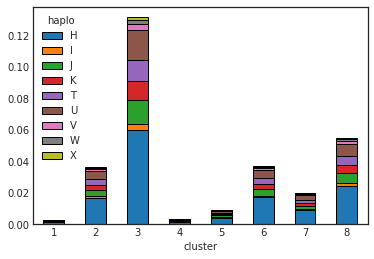

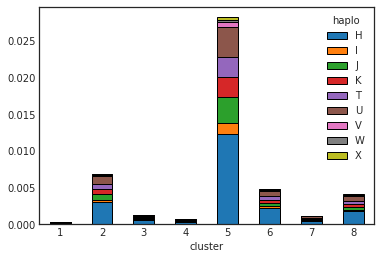

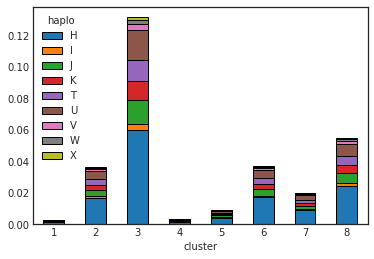

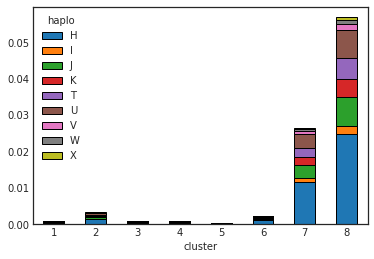

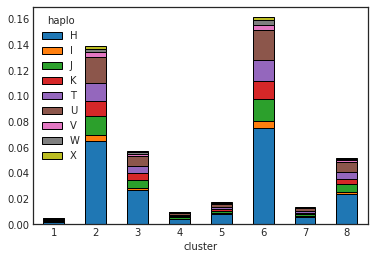

In [11]:
tot = clusters_EUR.shape[0]
clusters_EUR['cluster1'] = clusters_EUR['cluster1'].astype(int).astype(str)
#2/6/8 - North East and West
cluster_268 = clusters_EUR[clusters_EUR['NU_CL']=='Yorkshire, North West']
cluster_268_counts = cluster_268.groupby(['cluster1','macro_haplogroup']).count()
cluster_268_counts = cluster_268_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_268_counts.columns = ['cluster','haplo','count']
cluster_268_counts.insert(3,'Fraction',cluster_268_counts['count']/tot)
cluster_268_fraction = cluster_268_counts[['cluster','haplo','Fraction']].pivot(index='cluster',columns='haplo',values='Fraction')
cluster_268_fraction.plot.bar(rot=0,edgecolor='black',stacked=True)
#5
cluster_5 = clusters_EUR[clusters_EUR['NU_CL']=='Wales']
cluster_5_counts = cluster_5.groupby(['cluster1','macro_haplogroup']).count()
cluster_5_counts = cluster_5_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_5_counts.columns = ['cluster','haplo','count']
cluster_5_counts.insert(3,'Fraction',cluster_5_counts['count']/tot)
cluster_5_fraction = cluster_5_counts[['cluster','haplo','Fraction']].pivot(index='cluster',columns='haplo',values='Fraction')
cluster_5_fraction.plot.bar(rot=0,edgecolor='black',stacked=True)
#2/3/6 Yorkshire
cluster_236 = clusters_EUR[clusters_EUR['NU_CL']=='Yorkshire, North West']
cluster_236_counts = cluster_236.groupby(['cluster1','macro_haplogroup']).count()
cluster_236_counts = cluster_236_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_236_counts.columns = ['cluster','haplo','count']
cluster_236_counts.insert(3,'Fraction',cluster_236_counts['count']/tot)
cluster_236_fraction = cluster_236_counts[['cluster','haplo','Fraction']].pivot(index='cluster',columns='haplo',values='Fraction')
cluster_236_fraction.plot.bar(rot=0,edgecolor='black',stacked=True)
#7/8
cluster_78 = clusters_EUR[clusters_EUR['NU_CL']=='Scotland']
cluster_78_counts = cluster_78.groupby(['cluster1','macro_haplogroup']).count()
cluster_78_counts = cluster_78_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_78_counts.columns = ['cluster','haplo','count']
cluster_78_counts.insert(3,'Fraction',cluster_78_counts['count']/tot)
cluster_78_fraction = cluster_78_counts[['cluster','haplo','Fraction']].pivot(index='cluster',columns='haplo',values='Fraction')
cluster_78_fraction.plot.bar(rot=0,edgecolor='black',stacked=True)

#2/6
cluster_26 = clusters_EUR[clusters_EUR['NU_CL']=='Midlands,London,South East and West']
cluster_26_counts = cluster_26.groupby(['cluster1','macro_haplogroup']).count()
cluster_26_counts = cluster_26_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_26_counts.columns = ['cluster','haplo','count']
cluster_26_counts.insert(3,'Fraction',cluster_26_counts['count']/tot)
cluster_26_fraction = cluster_26_counts[['cluster','haplo','Fraction']].pivot(index='cluster',columns='haplo',values='Fraction')
cluster_26_fraction.plot.bar(rot=0,edgecolor='black',stacked=True)

In [150]:
#haplogroup_colors = ['#737373','#238b45','purple','#e31a1c','#ee5c42','#cd96cd','#a0522d','navy','#b8860b']
haplogroup_colors = ['darkorange','#238b45','purple','#e31a1c','#ee5c42','#cd96cd','#a0522d','navy','#b8860b']
haplo_dict = {'H':'darkorange','I':'#238b45', 'J':'purple','K':'#e31a1c','T':'#ee5c42','U':'#cd96cd','V':'#a0522d','W':'navy','X':'#b8860b'}

In [125]:
merged.head()

,objectid,nuts218cd,nuts218nm,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,NUTS2,NU_CL,Colors
0,1,UKC1,Tees Valley and Durham,414643,532242,-1.77440,54.685020,3.026249e+09,487438.014517,(POLYGON ((-193365.6979340445 7311064.18107926...,UKC1,North East and West,#d55e00
1,2,UKC2,Northumberland and Tyne and Wear,398898,602530,-2.01892,55.316841,5.566181e+09,751311.485119,(POLYGON ((-225327.5089228939 7477640.77805066...,UKC2,North East and West,#d55e00
2,3,UKD1,Cumbria,341868,527389,-2.90218,54.638260,6.822195e+09,987066.701024,(POLYGON ((-297845.3854653973 7360474.64982703...,UKD1,North East and West,#d55e00
3,4,UKD3,Greater Manchester,377940,401102,-2.33407,53.506149,1.275981e+09,248705.119145,POLYGON ((-237360.5331521469 7076090.247206025...,UKD3,"Yorkshire, North West",#cc79a7
4,5,UKD4,Lancashire,363669,441026,-2.55392,53.864182,3.076413e+09,795004.920936,(POLYGON ((-273750.3394512442 7180423.90122988...,UKD4,"Yorkshire, North West",#cc79a7


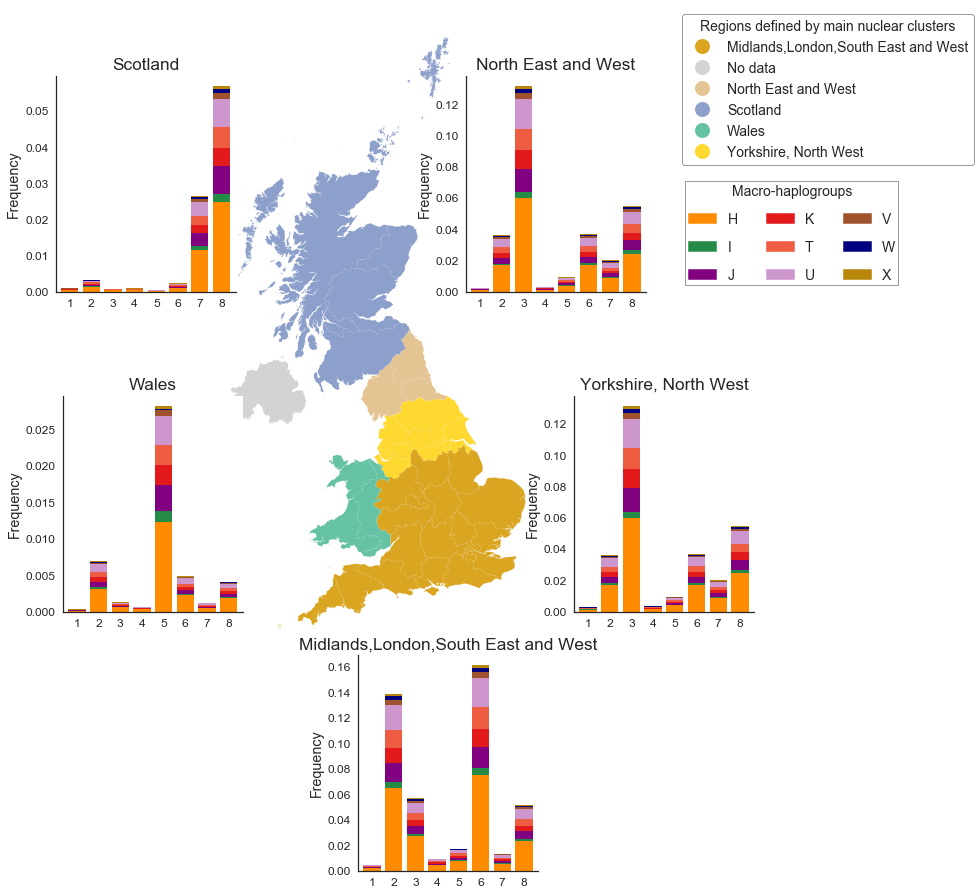

In [198]:
#MAP DARKER COLORS
from matplotlib.patches import ConnectionPatch
colors = ['goldenrod','lightgrey','#e5c494','#8da0cb','#66c2a5','#ffd92f']
colormap = ListedColormap(colors)
#colors = bmap.mpl_colors
#haplo_5_final,haplo_268_final,haplo_26_final,haplo_236_final,haplo_78_final
dic_df = {'Wales':cluster_5_fraction,'Midlands,London,South East and West':cluster_26_fraction,'Yorkshire, North West':cluster_236_fraction,'North East and West': cluster_268_fraction,'Scotland':cluster_78_fraction}
#dic_clusters = {'2':[['sandybrown','sandybrown','lavender'],[0.73,0.08,0.25,0.25], ["//"]*9+["////"]*9+[""]*9],'2/3':[['#F4D360','#F4D360','#F4D360','lavender'],[0.70,0.35,0.25,0.25], ["//"]*9+["\\\\"]*9+["////"]*9+[""]*9],'2/8':[['lightskyblue','lightskyblue','lightskyblue','lavender'],[0.65,0.63,0.25,0.25], ["//"]*9+["\\\\"]*9+["////"]*9+[""]*9],'5':[['turquoise','gainsboro','lavender'],[0.09,0.18,0.25,0.25], ["//"]*9+[""]*9+[""]*9],'7/8':[['gainsboro','plum','plum','lavender'],[0.08,0.55,0.25,0.25], [""]*9+["//"]*9+["////"]*9+[""]*9]}
dic_clusters = {'Midlands,London,South East and West':[[0.5,-0.12,0.25,0.25],'goldenrod'],'Yorkshire, North West':[[0.8,0.18,0.25,0.25],'#e5c494'],'North East and West':[[0.65,0.55,0.25,0.25],'#8da0cb'],'Wales':[[0.09,0.18,0.25,0.25],'#66c2a5'],'Scotland':[[0.08,0.55,0.25,0.25],'#8da0cb']}

f,ax = plt.subplots(1, figsize=(10, 12))
#ax = merged.plot(axes=ax)
merged.plot(column = 'NU_CL',ax = ax,cmap=colormap, facecolor='white',edgecolor=None,linewidth=0.0000001,legend=True, legend_kwds={'title': 'Regions defined by main nuclear clusters','ncol':1,'markerscale':1.5,'fontsize': 14,'title_fontsize':14})
ax.axis('equal')
leg = ax.get_legend()
leg.set_frame_on(True)
leg.set_bbox_to_anchor((1.4, 0.8, 0.2, 0.2))
ax.set_axis_off()

for i in dic_df:
    tag = i
    df = dic_df[tag]
    #df.index = df.Haplogroup
    left,bottom,widt,heigth= dic_clusters[tag][0]
    ax2= f.add_axes([left,bottom,widt,heigth])
    #plot barplot
    df.plot.bar(ax = ax2,rot=0, stacked = True,color=haplogroup_colors,width=0.8, linewidth=2, edgecolor=None,fontsize=12, legend=False,title=tag)
    ax2.xaxis.set_label_text("")
    ax2.yaxis.set_label_text("Frequency")
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    #ax2.legend(fontsize=11)
    #bars = ax2.patches
    #patterns = dic_clusters[tag][2]
    #for bar,hatch in zip(bars,patterns):
    #    bar.set_hatch(hatch)
    #ax2.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2)
#prepare legend
handles = []
for i in haplo_dict:
	patch=mpatches.Patch(color=haplo_dict[i],label=i)
	handles.append(patch)
ax3 = f.add_axes([1.06, 0.55,0.2,0.2])
ax3.legend(handles=handles,markerscale=1.5,borderpad=0.2,labelspacing=1,loc='lower right',fontsize=14,ncol=3,fancybox=False,shadow=False,frameon=True,title='Macro-haplogroups',title_fontsize=14)
ax3.set_axis_off()

#plt.savefig('UK_map_geopandas_darkercolors_notebook.pdf',dpi=300)
#plt.savefig('UK_map_geopandas_v3.tiff',dpi=300,bbox_inches='tight',format='tiff')
#plt.savefig('UK_map_geopandas_darkercolors.jpeg',dpi=500,bbox_inches='tight',format='jpeg')
plt.savefig('UK_map_geopandas_v3.png',dpi=1000,bbox_inches='tight',format='png')
#plt.savefig('UK_map_geopandas_darkercolors.pdf',bbox_inches='tight')
#plt.savefig('UK_map_geopandas_darkercolors.svg',format='svg',dpi=600)


In [202]:
plt.style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10']

In [199]:
plt.rcParams

/Users/cc926/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.forma

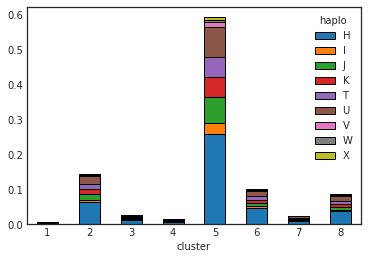

In [16]:
cluster_5 = clusters_EUR[clusters_EUR['NU_CL']=='Wales']
cluster_5_counts = cluster_5.groupby(['cluster1','macro_haplogroup']).count()
cluster_5_counts = cluster_5_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_5_counts.columns = ['cluster','haplo','count']
cluster_5_counts.insert(3,'Fraction',cluster_5_counts['count']/sum(cluster_5_counts['count']))
cluster_5_fraction = cluster_5_counts[['cluster','haplo','Fraction']].pivot(index='cluster',columns='haplo',values='Fraction')
cluster_5_fraction.plot.bar(rot=0,edgecolor='black',stacked=True)
#cluster_5_fraction

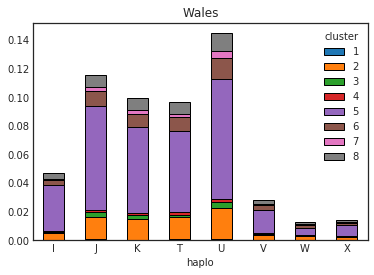

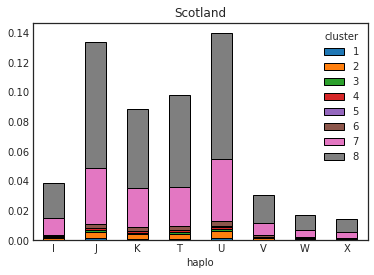

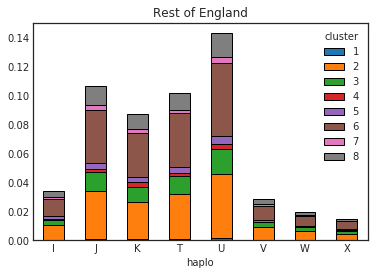

In [26]:
cluster_5 = clusters_EUR[clusters_EUR['NU_CL']=='Wales']
cluster_5_counts = cluster_5.groupby(['cluster1','macro_haplogroup']).count()
cluster_5_counts = cluster_5_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_5_counts.columns = ['cluster','haplo','count']
cluster_5_counts.insert(3,'Fraction',cluster_5_counts['count']/sum(cluster_5_counts['count']))
cluster_5_fraction = cluster_5_counts[['cluster','haplo','Fraction']].pivot(index='haplo',columns='cluster',values='Fraction')
cluster_5_fraction.iloc[1:,:].plot.bar(rot=0,edgecolor='black',stacked=True,title='Wales')

cluster_78 = clusters_EUR[clusters_EUR['NU_CL']=='Scotland']
cluster_78_counts = cluster_78.groupby(['cluster1','macro_haplogroup']).count()
cluster_78_counts = cluster_78_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_78_counts.columns = ['cluster','haplo','count']
cluster_78_counts.insert(3,'Fraction',cluster_78_counts['count']/sum(cluster_78_counts['count']))
cluster_78_fraction = cluster_78_counts[['cluster','haplo','Fraction']].pivot(index='haplo',columns='cluster',values='Fraction')
cluster_78_fraction.iloc[1:,:].plot.bar(rot=0,edgecolor='black',stacked=True,title='Scotland')

#2/6
cluster_26 = clusters_EUR[clusters_EUR['NU_CL']=='Midlands,London,South East and West']
cluster_26_counts = cluster_26.groupby(['cluster1','macro_haplogroup']).count()
cluster_26_counts = cluster_26_counts.reset_index()[['cluster1','macro_haplogroup','NUTS2']]
cluster_26_counts.columns = ['cluster','haplo','count']
cluster_26_counts.insert(3,'Fraction',cluster_26_counts['count']/sum(cluster_26_counts['count']))
cluster_26_fraction = cluster_26_counts[['cluster','haplo','Fraction']].pivot(index='haplo',columns='cluster',values='Fraction')
cluster_26_fraction.iloc[1:,:].plot.bar(rot=0,edgecolor='black',stacked=True,title='Rest of England')

In [ ]:
#https://colormaps.ml/Accent take palette with 8 and do not put blue and purple close to each other